<a href="https://colab.research.google.com/github/nitish-raj/Price-Predictions-ML/blob/master/Algorithmic_Trading_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**
This program uses following two methonds to determine when to buy and sell stock:


1. The dual simple moving average crossover (SMA 30 vs SMA 100)
2. Moving Average Convergence/Divergence (MACD) Cross Over
3. Three moving average
4. Money Flow Index(MFI)



In [43]:
# Import the liraries
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [56]:
# Load the data
# Get the stock quote
AAPL = web.DataReader("AAPL", data_source="yahoo", start="2014-04-01", end="2021-04-30")
# Show data
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,19.352501,19.170357,19.205713,19.344643,200760000.0,17.306803
2014-04-02,19.410000,19.295000,19.370714,19.376785,180420800.0,17.335567
2014-04-03,19.375000,19.201429,19.335358,19.242500,162344000.0,17.215427
2014-04-04,19.285713,18.949286,19.278929,18.993570,275251200.0,16.992723
2014-04-07,18.960714,18.638929,18.857857,18.695356,289850400.0,16.725920
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


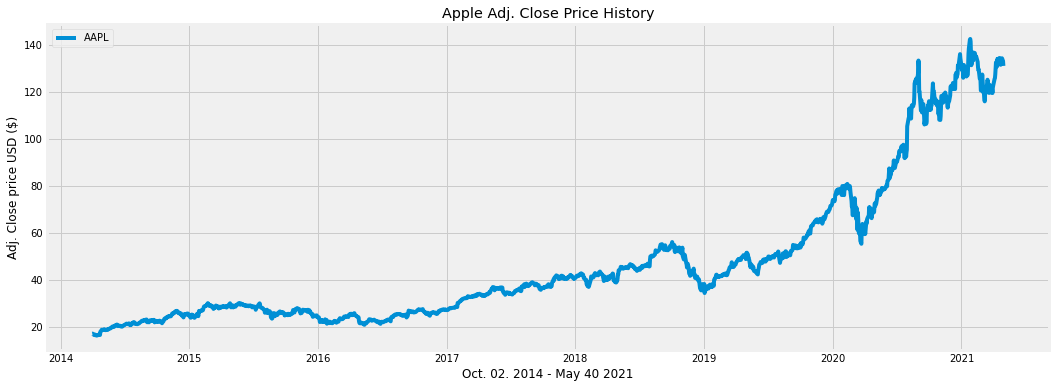

In [33]:
# Visualize the data
plt.figure(figsize=(16, 6))
plt.plot(AAPL["Adj Close"], label="AAPL")
plt.title("Apple Adj. Close Price History")
plt.xlabel("Oct. 02. 2014 - May 40 2021")
plt.ylabel("Adj. Close price USD ($)")
plt.legend(loc="upper left")
plt.show()

## **Strategy 1 : SMA**

In [16]:
# Create the simple moving average with 30 day window
SMA30 = pd.DataFrame()
SMA30["Adj Close Price"] = AAPL["Adj Close"].rolling(window=30).mean()
SMA30

,Adj Close Price
Date,
2014-04-01,NaN
2014-04-02,NaN
2014-04-03,NaN
2014-04-04,NaN
2014-04-07,NaN
...,...
2021-04-26,127.159344
2021-04-27,127.505422
2021-04-28,127.771970


In [17]:
# Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100["Adj Close Price"] = AAPL["Adj Close"].rolling(window=100).mean()
SMA100

,Adj Close Price
Date,
2014-04-01,NaN
2014-04-02,NaN
2014-04-03,NaN
2014-04-04,NaN
2014-04-07,NaN
...,...
2021-04-26,128.348327
2021-04-27,128.466657
2021-04-28,128.573312


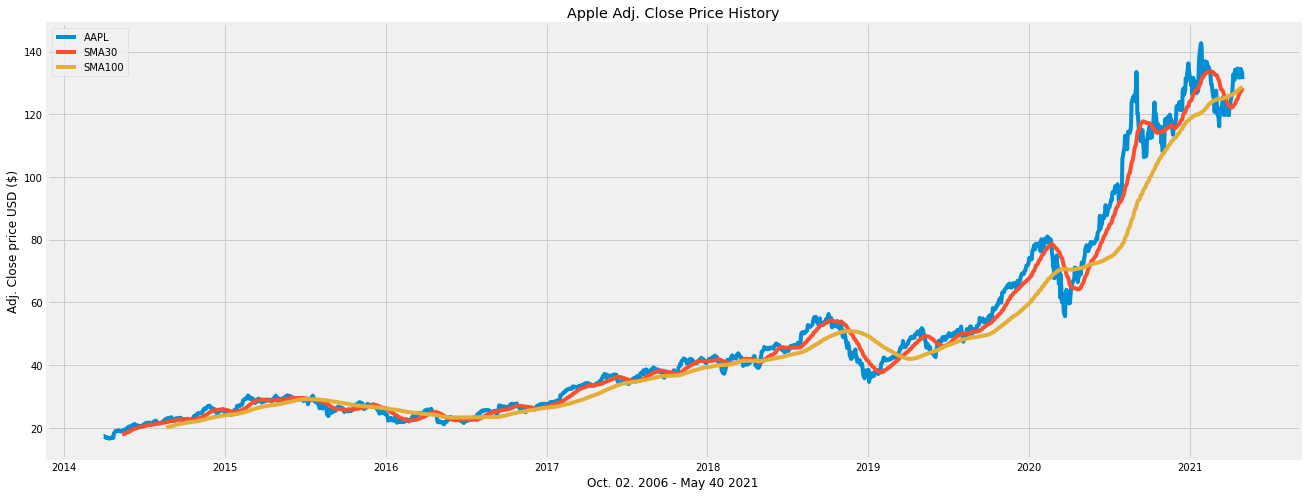

In [19]:
# Visualize the data
plt.figure(figsize=(20, 8))
plt.plot(AAPL["Adj Close"], label="AAPL")
plt.plot(SMA30["Adj Close Price"], label="SMA30")
plt.plot(SMA100["Adj Close Price"], label="SMA100")
plt.title("Apple Adj. Close Price History")
plt.xlabel("Oct. 02. 2006 - May 40 2021")
plt.ylabel("Adj. Close price USD ($)")
plt.legend(loc="upper left")
plt.show()

In [12]:
# Create a new data frame to store all the data
data = pd.DataFrame()
data["AAPL"] = AAPL["Adj Close"]
data["SMA30"] = SMA30["Adj Close Price"]
data["SMA100"] = SMA100["Adj Close Price"]
data

,AAPL,SMA30,SMA100
Date,,,
2006-10-02,2.299011,NaN,NaN
2006-10-03,2.275057,NaN,NaN
2006-10-04,2.314981,NaN,NaN
2006-10-05,2.298089,NaN,NaN
2006-10-06,2.279357,NaN,NaN
...,...,...,...
2021-04-26,134.491562,127.159344,128.348327
2021-04-27,134.162109,127.505422,128.466657
2021-04-28,133.353485,127.771970,128.573312


In [28]:
# Create function to signal when to buy and sell the asset/ stock
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data["SMA30"][i] > data["SMA100"][i]:
            if flag != 1:
                sigPriceBuy.append(data["AAPL"][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data["SMA30"][i] < data["SMA100"][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["AAPL"][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [29]:
# Store the buy and sell data into
buy_sell = buy_sell(data)
data["Signal_buy_Price"] = buy_sell[0]
data["Signal_sell_Price"] = buy_sell[1]

In [30]:
# Show the data
data

,AAPL,SMA30,SMA100,Signal_buy_Price,Signal_sell_Price
Date,,,,,
2006-10-02,2.299011,NaN,NaN,NaN,NaN
2006-10-03,2.275057,NaN,NaN,NaN,NaN
2006-10-04,2.314981,NaN,NaN,NaN,NaN
2006-10-05,2.298089,NaN,NaN,NaN,NaN
2006-10-06,2.279357,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-04-26,134.491562,127.159344,128.348327,NaN,NaN
2021-04-27,134.162109,127.505422,128.466657,NaN,NaN
2021-04-28,133.353485,127.771970,128.573312,NaN,NaN


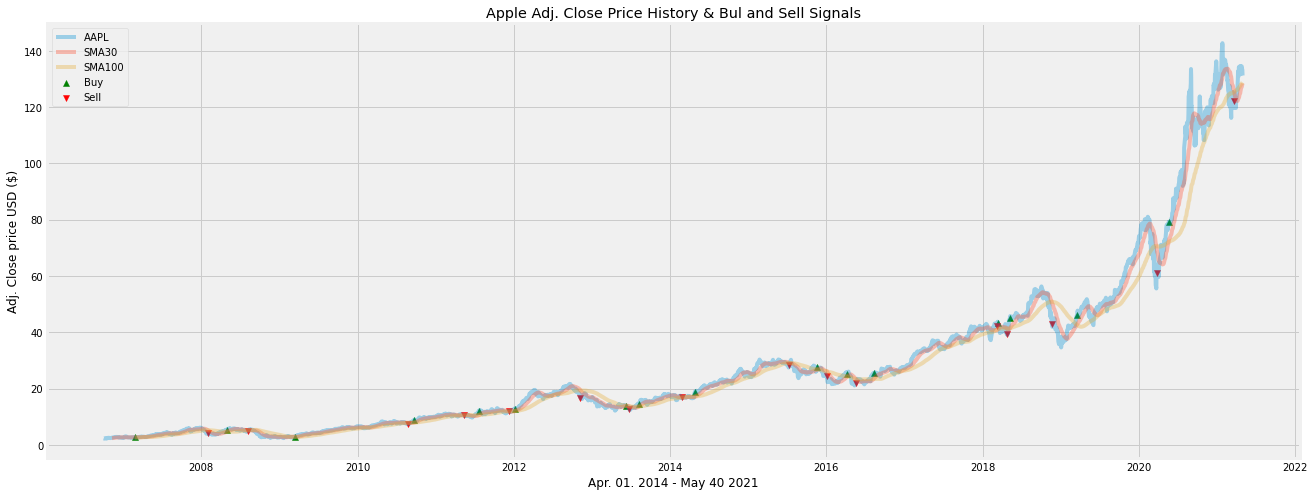

In [31]:
# Visualize the data and strategy to buy and sell stock
plt.figure(figsize=(20, 8))
plt.plot(data["AAPL"], label="AAPL", alpha=0.35)
plt.plot(data["SMA30"], label="SMA30", alpha=0.35)
plt.plot(data["SMA100"], label="SMA100", alpha=0.35)
plt.scatter(
    data.index, data["Signal_buy_Price"], label="Buy", marker="^", color="green"
)
plt.scatter(
    data.index, data["Signal_sell_Price"], label="Sell", marker="v", color="red"
)
plt.title("Apple Adj. Close Price History & Buy and Sell Signals")
plt.xlabel("Apr. 01. 2014 - May 40 2021")
plt.ylabel("Adj. Close price USD ($)")
plt.legend(loc="upper left")
plt.show()

## **Strategy 2: MACD**


In [57]:
# Load the data
# Get the stock quote
AAPL = web.DataReader(
    "PNB.NS", data_source="yahoo", start="2021-02-01", end="2021-05-18"
)
# Show data
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-01,36.000000,33.099998,33.750000,35.750000,200145354,35.750000
2021-02-02,36.849998,35.549999,36.099998,36.200001,199832087,36.200001
2021-02-03,38.750000,35.700001,36.450001,38.349998,260980002,38.349998
2021-02-04,41.000000,38.000000,38.500000,40.500000,384813812,40.500000
2021-02-05,42.750000,39.700001,41.299999,40.150002,329090924,40.150002
...,...,...,...,...,...,...
2021-05-11,35.349998,33.750000,34.849998,35.049999,231689524,35.049999
2021-05-12,38.200001,35.549999,35.750000,37.099998,345869236,37.099998
2021-05-14,38.400002,36.500000,37.799999,36.799999,185587845,36.799999


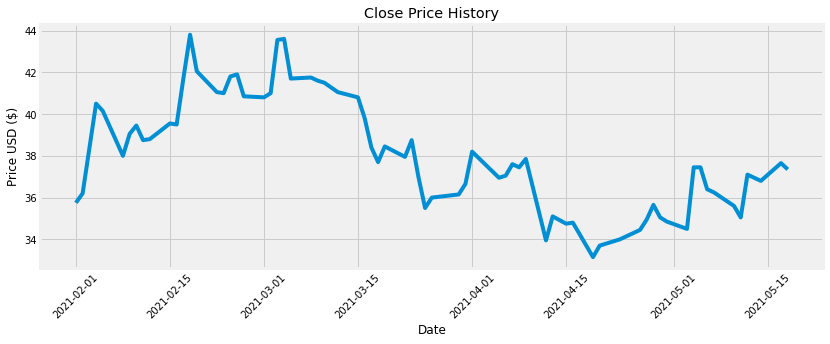

In [58]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL["Close"], label="Close")
plt.xticks(rotation=45)
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.show()

In [59]:
# Calculate the MACD and Signal line indicators
# Calculated the short term exponential moving average (EMA)
ShortEMA = AAPL.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average
LongEMA = AAPL.Close.ewm(span=26, adjust=False).mean()
# Calculate the MACD line
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

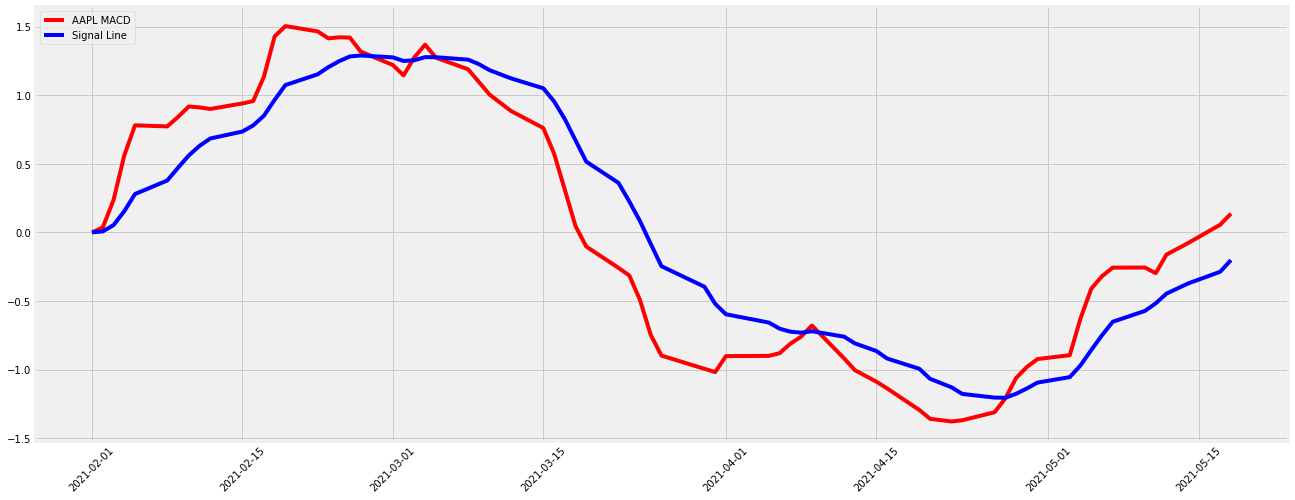

In [60]:
# Plot the chart
plt.figure(figsize=(20, 8))
plt.plot(AAPL.index, MACD, label="AAPL MACD", color="red")
plt.plot(AAPL.index, signal, label="Signal Line", color="blue")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

In [61]:
# Creaet new columns for the data
AAPL["MACD"] = MACD
AAPL["Signal Line"] = signal

# Show data
AAPL

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2021-02-01,36.000000,33.099998,33.750000,35.750000,200145354,35.750000,0.000000,0.000000
2021-02-02,36.849998,35.549999,36.099998,36.200001,199832087,36.200001,0.035897,0.007179
2021-02-03,38.750000,35.700001,36.450001,38.349998,260980002,38.349998,0.235123,0.052768
2021-02-04,41.000000,38.000000,38.500000,40.500000,384813812,40.500000,0.560042,0.154223
2021-02-05,42.750000,39.700001,41.299999,40.150002,329090924,40.150002,0.780306,0.279440
...,...,...,...,...,...,...,...,...
2021-05-11,35.349998,33.750000,34.849998,35.049999,231689524,35.049999,-0.297195,-0.517341
2021-05-12,38.200001,35.549999,35.750000,37.099998,345869236,37.099998,-0.162170,-0.446307
2021-05-14,38.400002,36.500000,37.799999,36.799999,185587845,36.799999,-0.078465,-0.372738


In [62]:
# Create a function to signal whn to buy and sell and asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1

    for i in range(len(signal)):
        if signal["MACD"][i] > signal["Signal Line"][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Close"][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal["MACD"][i] < signal["Signal Line"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal["Close"][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
    return Buy, Sell

In [63]:
# Create buy and sell column
a = buy_sell(AAPL)
AAPL["Buy signal Price"] = a[0]
AAPL["Sell Signal Price"] = a[1]
AAPL

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy signal Price,Sell Signal Price
Date,,,,,,,,,,
2021-02-01,36.000000,33.099998,33.750000,35.750000,200145354,35.750000,0.000000,0.000000,NaN,NaN
2021-02-02,36.849998,35.549999,36.099998,36.200001,199832087,36.200001,0.035897,0.007179,36.200001,NaN
2021-02-03,38.750000,35.700001,36.450001,38.349998,260980002,38.349998,0.235123,0.052768,NaN,NaN
2021-02-04,41.000000,38.000000,38.500000,40.500000,384813812,40.500000,0.560042,0.154223,NaN,NaN
2021-02-05,42.750000,39.700001,41.299999,40.150002,329090924,40.150002,0.780306,0.279440,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-11,35.349998,33.750000,34.849998,35.049999,231689524,35.049999,-0.297195,-0.517341,NaN,NaN
2021-05-12,38.200001,35.549999,35.750000,37.099998,345869236,37.099998,-0.162170,-0.446307,NaN,NaN
2021-05-14,38.400002,36.500000,37.799999,36.799999,185587845,36.799999,-0.078465,-0.372738,NaN,NaN


In [64]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy signal Price,Sell Signal Price
Date,,,,,,,,,,
2021-02-01,36.000000,33.099998,33.750000,35.750000,200145354,35.750000,0.000000,0.000000,NaN,NaN
2021-02-02,36.849998,35.549999,36.099998,36.200001,199832087,36.200001,0.035897,0.007179,36.200001,NaN
2021-02-03,38.750000,35.700001,36.450001,38.349998,260980002,38.349998,0.235123,0.052768,NaN,NaN
2021-02-04,41.000000,38.000000,38.500000,40.500000,384813812,40.500000,0.560042,0.154223,NaN,NaN
2021-02-05,42.750000,39.700001,41.299999,40.150002,329090924,40.150002,0.780306,0.279440,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-11,35.349998,33.750000,34.849998,35.049999,231689524,35.049999,-0.297195,-0.517341,NaN,NaN
2021-05-12,38.200001,35.549999,35.750000,37.099998,345869236,37.099998,-0.162170,-0.446307,NaN,NaN
2021-05-14,38.400002,36.500000,37.799999,36.799999,185587845,36.799999,-0.078465,-0.372738,NaN,NaN


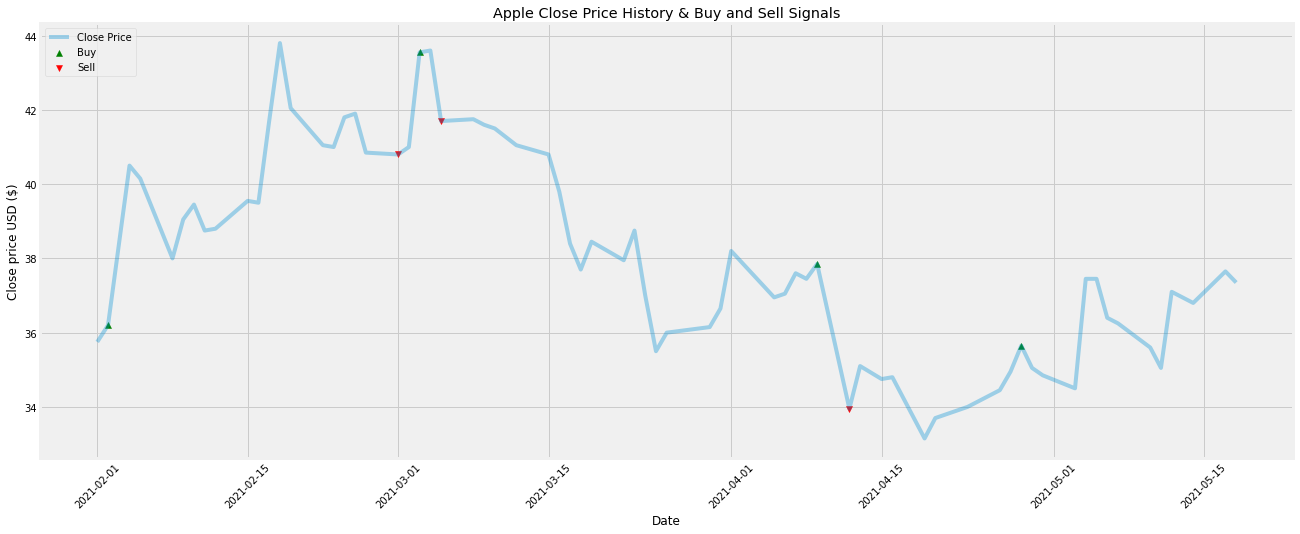

In [65]:
# Visualize the data and strategy to buy and sell stock
plt.figure(figsize=(20, 8))
plt.plot(AAPL["Close"], label="Close Price", alpha=0.35)
plt.scatter(
    AAPL.index,
    AAPL["Buy signal Price"],
    label="Buy",
    marker="^",
    color="green",
    alpha=1,
)
plt.scatter(
    AAPL.index, AAPL["Sell Signal Price"], label="Sell", marker="v", color="red"
)
plt.title("Apple Close Price History & Buy and Sell Signals")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Close price USD ($)")
plt.legend(loc="upper left")
plt.show()

## **Strategy 3: Three Moving Average**

In [45]:
# Load the data
# Get the stock quote
df = web.DataReader("TSLA", data_source="yahoo", start="2020-01-01", end="2021-05-30")
# Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-05-13,606.460022,559.650024,601.539978,571.690002,44184900.0,571.690002
2021-05-14,592.869995,570.460022,583.409973,589.739990,33230600.0,589.739990
2021-05-17,589.729980,561.200012,575.549988,576.830017,32390400.0,576.830017


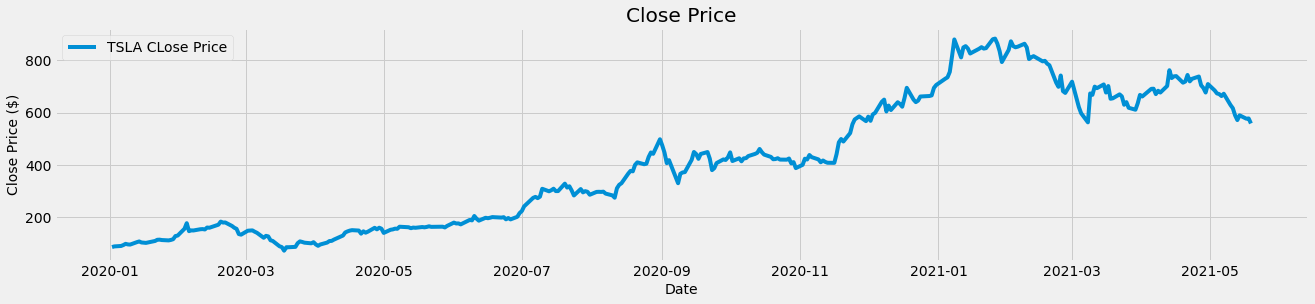

In [46]:
# Visualize the data
plt.figure(figsize=(20, 4))
plt.title("Close Price")
plt.plot(df["Close"], label="TSLA CLose Price")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price ($)", fontsize=14)
plt.legend(loc="upper left")
plt.show()

In [47]:
# Calculate the three moving averages

# Calculate the shoft/fast exponenetial moving average
df["ShortEMA"] = df.Close.ewm(span=5, adjust=False).mean()

# Calculate the Middle/Medium exponential moving averages
df["MiddleEMA"] = df.Close.ewm(span=21, adjust=False).mean()

# Calculate the long/slow exponential moving average
df["LongEMA"] = df.Close.ewm(span=63, adjust=False).mean()

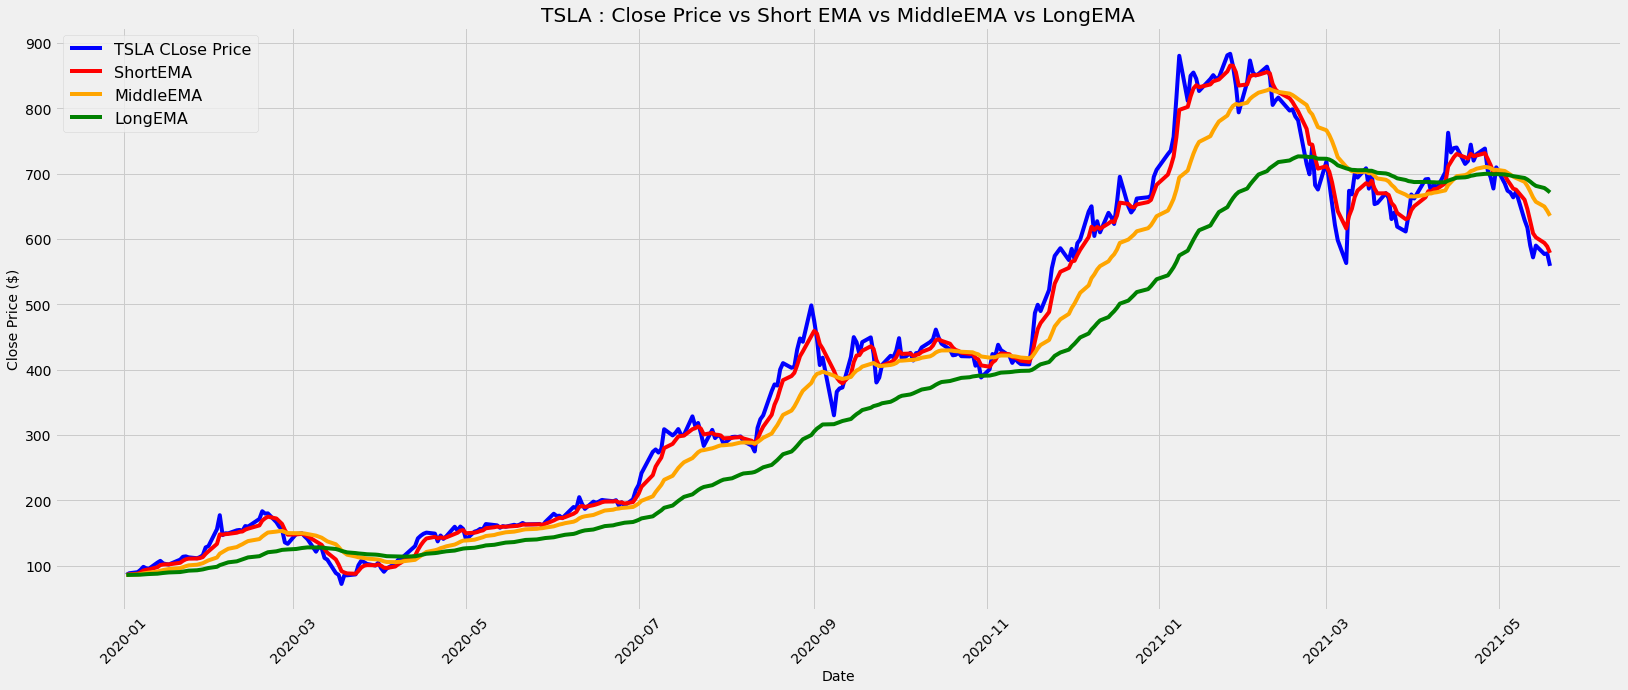

In [48]:
# Visualiuze the closing price and the exponential moving averages
# Visualize the data
plt.figure(figsize=(25, 10))
plt.title("TSLA : Close Price vs Short EMA vs MiddleEMA vs LongEMA")
plt.plot(df["Close"], label="TSLA CLose Price", color="blue")
plt.plot(df["ShortEMA"], label="ShortEMA", color="red")
plt.plot(df["MiddleEMA"], label="MiddleEMA", color="orange")
plt.plot(df["LongEMA"], label="LongEMA", color="green")
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Close Price ($)", fontsize=14)
plt.legend(loc="upper left", fontsize=16)
plt.show()

In [55]:
# Create the function to buy and sell the stock


def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if (
            (data["MiddleEMA"][i] < data["LongEMA"][i])
            and (data["ShortEMA"][i] < data["MiddleEMA"][i])
            and flag_long == False
            and flag_short == False
        ):
            buy_list.append(data["Close"][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data["ShortEMA"][i] > data["MiddleEMA"][i]:
            sell_list.append(data["Close"][i])
            buy_list.append(np.nan)
            flag_short = False
        elif (
            data["MiddleEMA"][i] > data["LongEMA"][i]
            and data["ShortEMA"][i] > data["MiddleEMA"][i]
            and flag_long == False
            and flag_short == False
        ):
            buy_list.append(data["Close"][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data["ShortEMA"][i] < data["MiddleEMA"][i]:
            sell_list.append(data["Close"][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return (buy_list, sell_list)

In [56]:
df["Buy"] = buy_sell_function(df)[0]
df["Sell"] = buy_sell_function(df)[1]

In [57]:
df

,High,Low,Open,Close,Volume,Adj Close,ShortEMA,MiddleEMA,LongEMA,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,86.052002,86.052002,86.052002,NaN,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,86.902000,86.283820,86.131689,88.601997,NaN
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,88.037333,86.649654,86.262199,NaN,NaN
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,89.962221,87.300776,86.498130,NaN,NaN
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,92.784148,88.312342,86.870939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,606.460022,559.650024,601.539978,571.690002,44184900.0,571.690002,608.603572,663.461225,684.017253,NaN,NaN
2021-05-14,592.869995,570.460022,583.409973,589.739990,33230600.0,589.739990,602.315711,656.759294,681.071089,NaN,NaN
2021-05-17,589.729980,561.200012,575.549988,576.830017,32390400.0,576.830017,593.820480,649.492996,677.813555,NaN,NaN


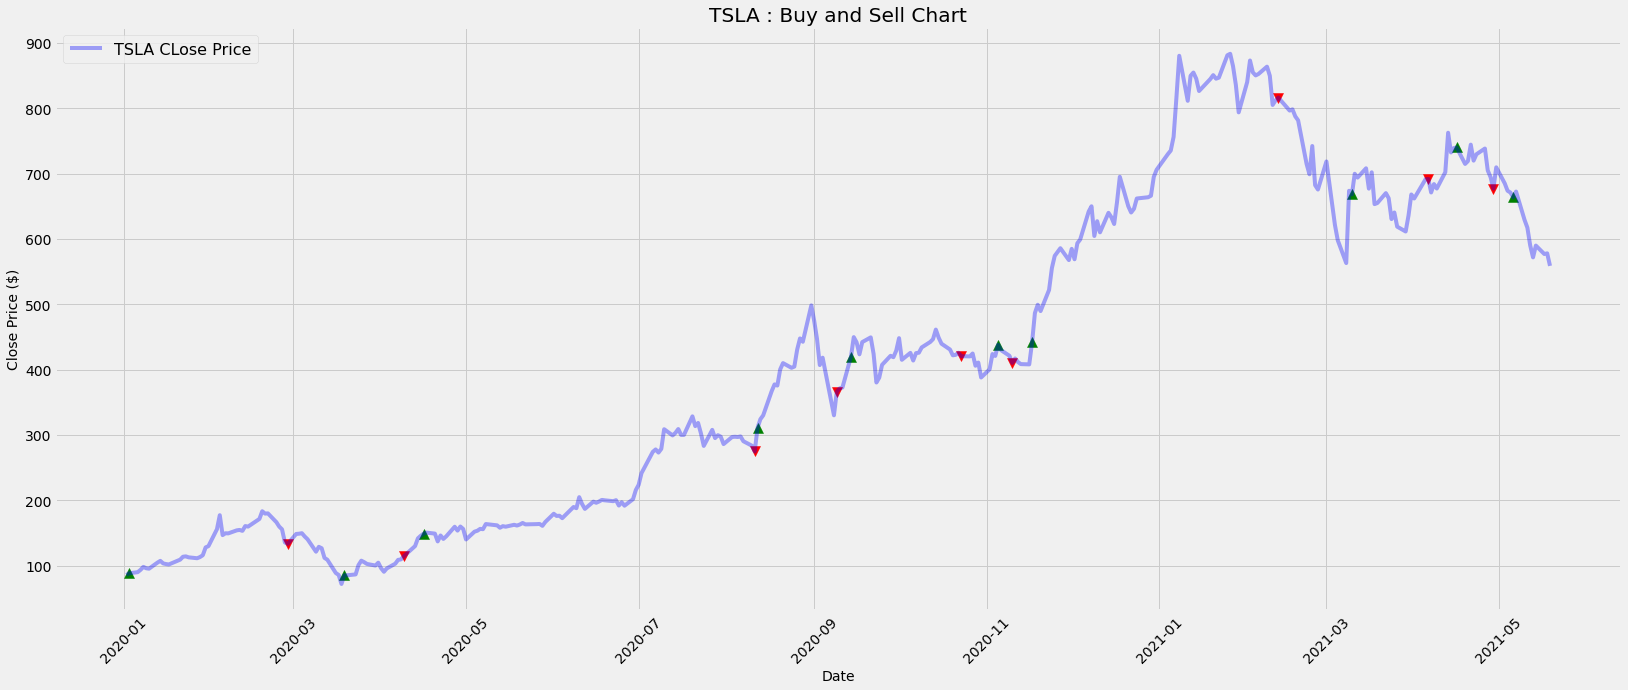

In [66]:
# Visualiuze the closing price and the exponential moving averages
# Visualize the data
plt.figure(figsize=(25, 10))
plt.title("TSLA : Buy and Sell Chart")
plt.plot(df["Close"], label="TSLA CLose Price", color="blue", alpha=0.35)
# plt.plot(df['ShortEMA'],label = 'Short/Fast EMA',color = 'red',alpha = 0.35)
# plt.plot(df['MiddleEMA'],label = 'Middle/Medium EMA', color = 'orange',alpha = 0.35)
# plt.plot(df['LongEMA'],label = 'Long/Slow EMA',color = 'green',alpha = 0.35)
plt.scatter(df.index, df["Buy"], color="green", marker="^", alpha=1, s=100)
plt.scatter(df.index, df["Sell"], color="red", marker="v", alpha=1, s=100)
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Close Price ($)", fontsize=14)
plt.legend(loc="upper left", fontsize=16)
plt.show()

## **Strategy 4: MFI**

In [67]:
# Load the data
# Get the stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2020-01-01", end="2021-05-30")
# Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.207466
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.486023
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.909149
...,...,...,...,...,...,...
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.970001
2021-05-14,127.889999,125.849998,126.250000,127.449997,81806500.0,127.449997
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997
